#Image Background Removal

In [ ]:
!pip install transparent-background

In [ ]:
!pip install rembg

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import math

In [6]:
# function to display images in a grid format
def display_image_grid(images, titles=None, cols=3, figsize=(15, 15)):

    rows = math.ceil(len(images) / cols)
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    axs = axs.flatten()

    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].axis('off')

        if titles and i < len(titles):
            axs[i].set_title(titles[i])

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

In [8]:
img1 = Image.open('biker.jpg')
img2 = Image.open('tennis_player_1.jpg')
img3 = Image.open('robot.jpg')

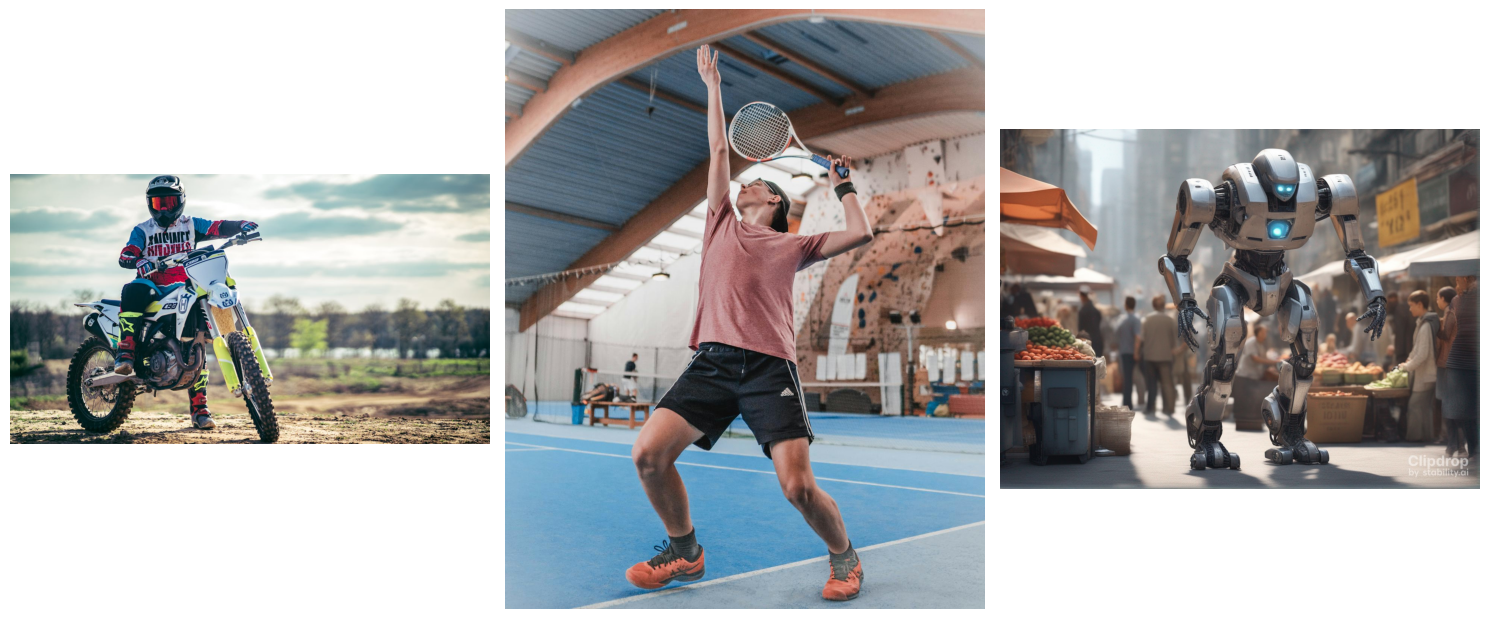

In [9]:
display_image_grid([img1, img2, img3])

# Option 1 - Transparent Background

In [10]:
from transparent_background import Remover

In [11]:
# background remover
remover = Remover()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Settings -> Mode=base, Device=cpu, Torchscript=disabled


In [12]:
img1_nobg = remover.process(img1)
img2_nobg = remover.process(img2)
img3_nobg = remover.process(img3)

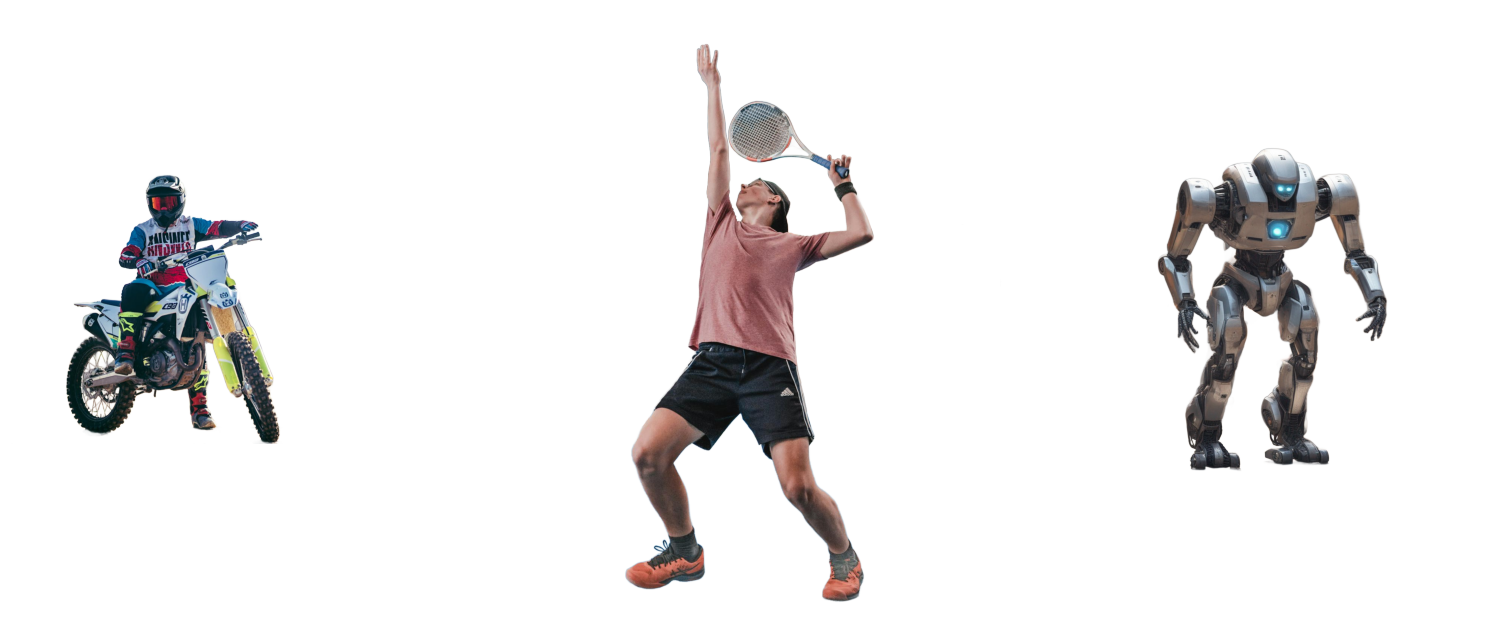

In [13]:
display_image_grid([img1_nobg, img2_nobg, img3_nobg])

# Option 2 - Rembg

In [14]:
from rembg import remove

In [15]:
img1_nobg_rembg = remove(img1)
img2_nobg_rembg = remove(img2)
img3_nobg_rembg = remove(img3)

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 106GB/s]


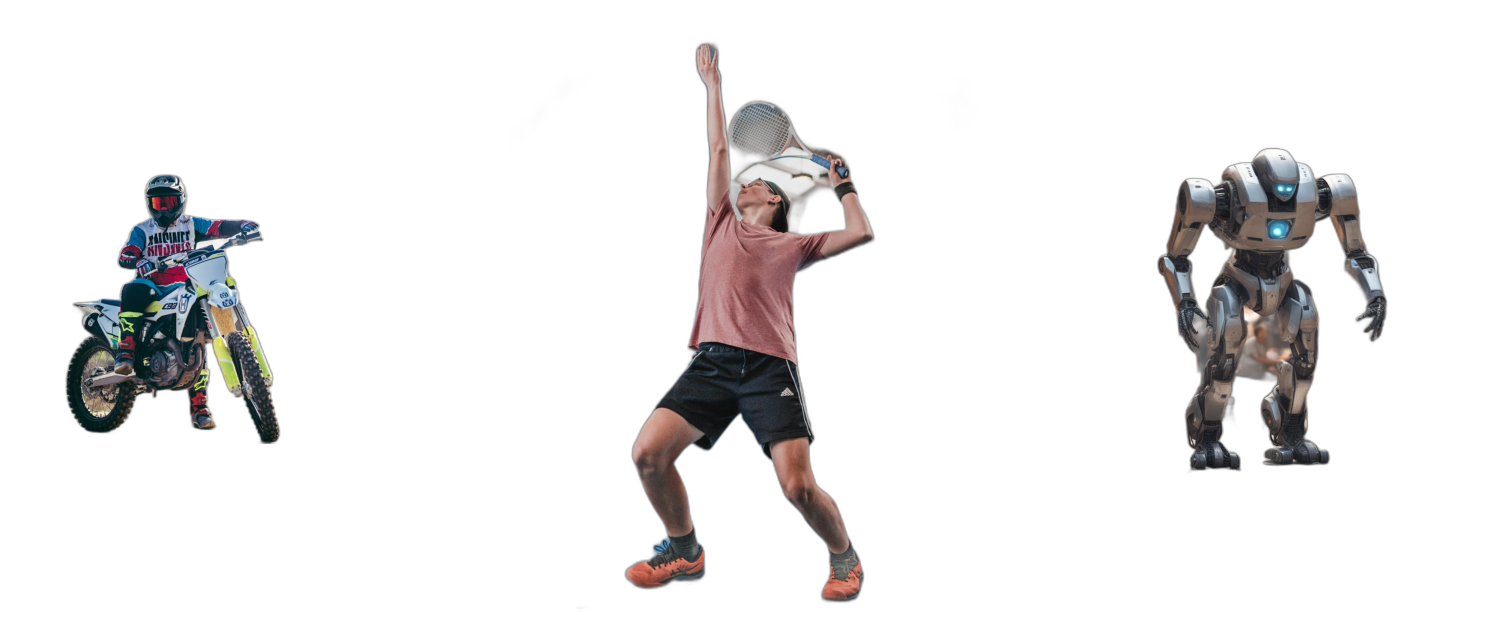

In [16]:
display_image_grid([img1_nobg_rembg, img2_nobg_rembg, img3_nobg_rembg])

# Transparent Background vs Rembg

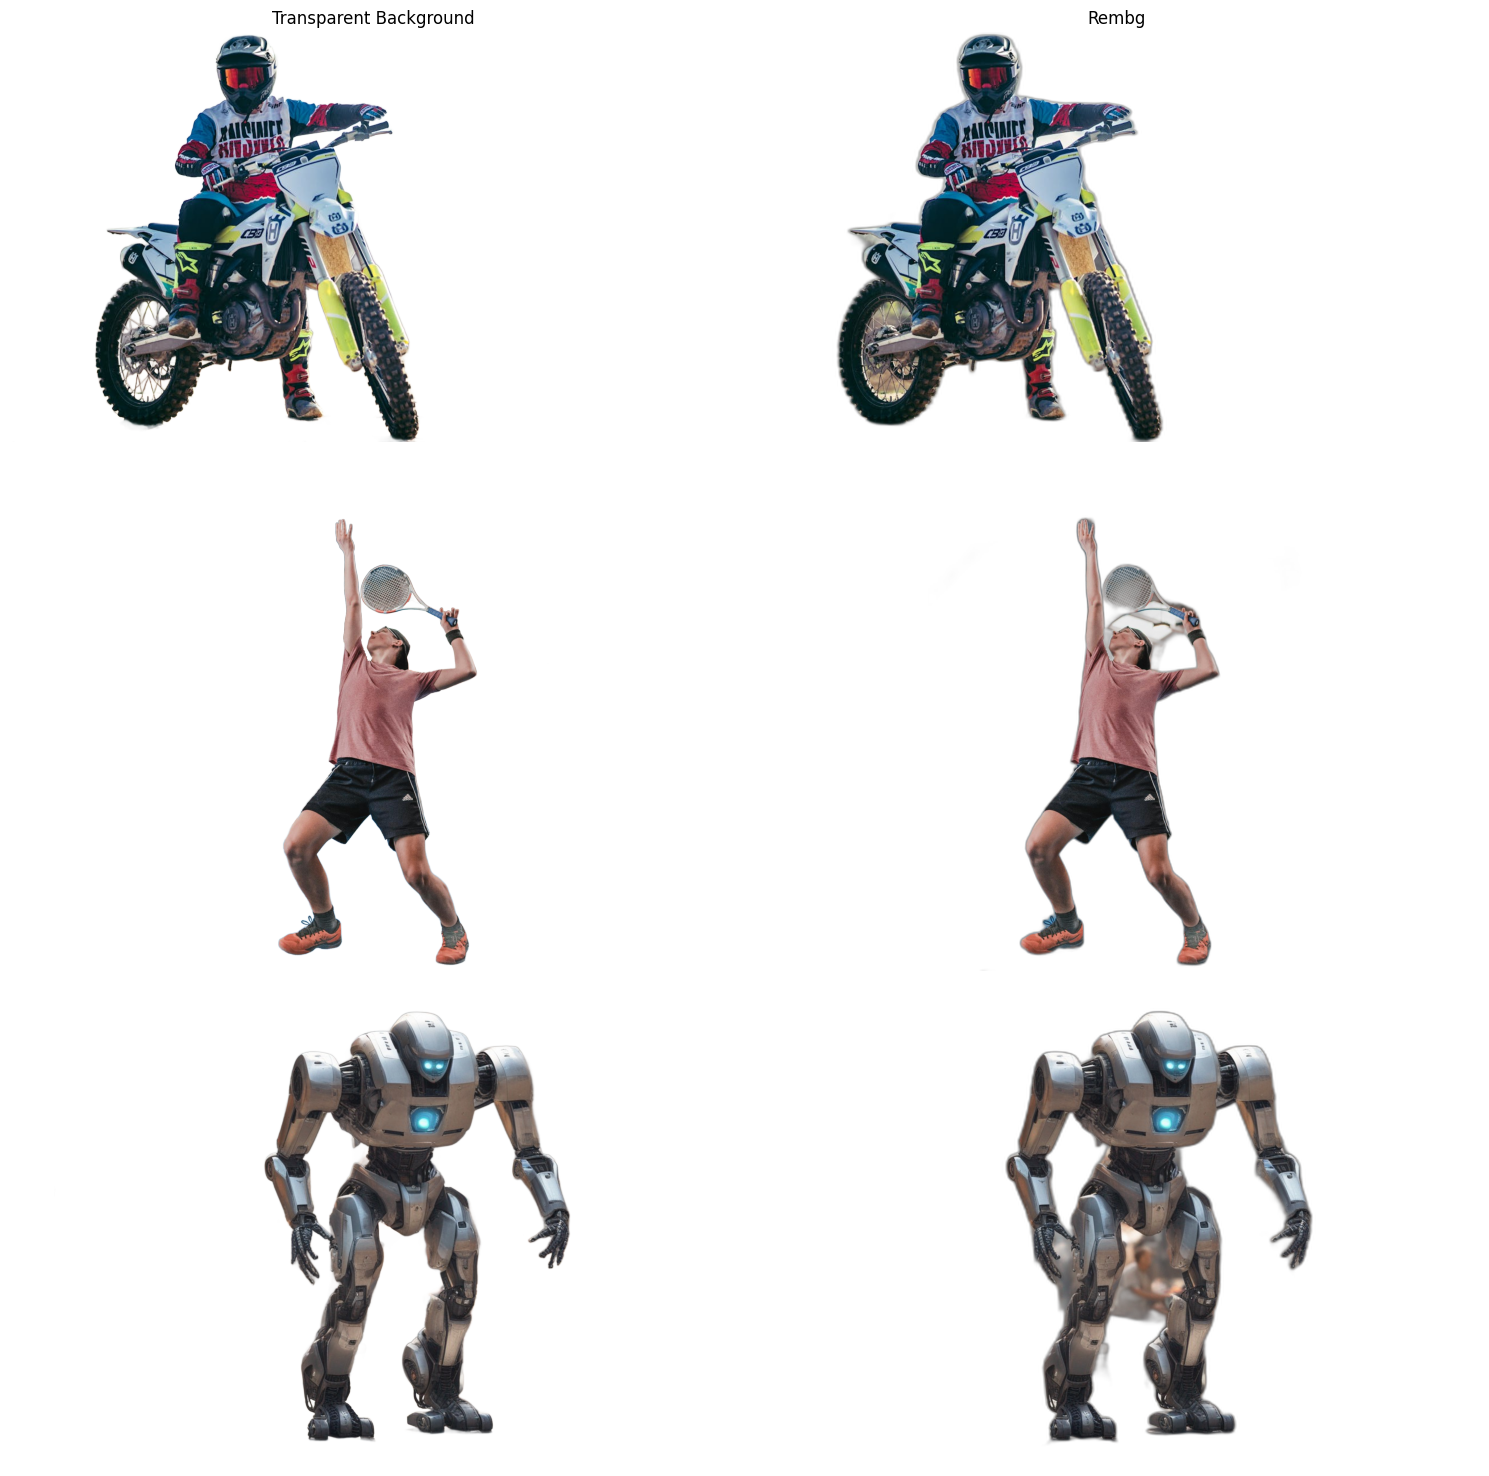

In [17]:
display_image_grid([img1_nobg, img1_nobg_rembg,
                    img2_nobg, img2_nobg_rembg,
                    img3_nobg, img3_nobg_rembg],
                   titles = ["Transparent Background", "Rembg"],
                   cols=2)